<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 13 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Provinsi                                                              514 non-null    object 
 1   Kab/Kota                                                              514 non-null    object 
 2   Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)       514 non-null    object 
 3   Rata-rata Lama Sekolah Penduduk 15+ (Tahun)                           514 non-null    object 
 4   Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)          514 non-null    float64
 5   Indeks Pembangunan Manusia                                            514 non-null    object 
 6   Umur Harapan Hidup (Tahun)                                            514 non-null    object 
 7  

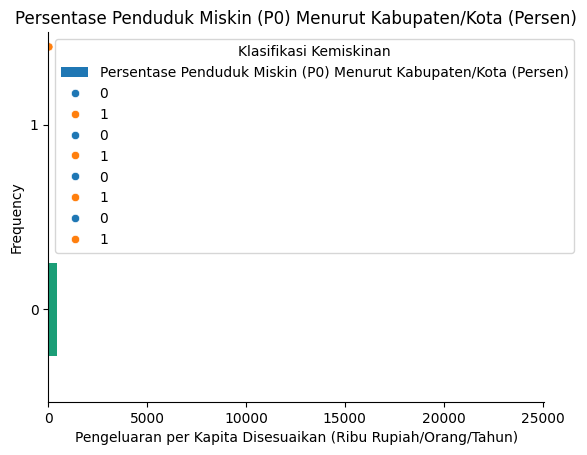

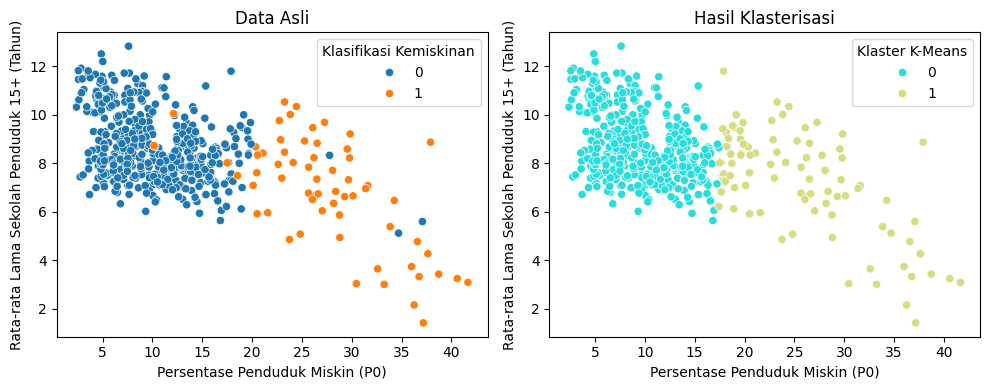

Akurasi K-Means: 0.9396887159533074


In [10]:
import pandas as pd
import numpy as np
import seaborn as sns


#Load Data
df = pd.read_csv('Klasifikasi Tingkat Kemiskinan di Indonesia.csv', delimiter=';')
df

#Cek info
df.info()


#Cek data
df.isnull().sum()


#Pra Processing Data-Mengubah Tipe Data Objek Manjadi Float

df['Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)'] = df['Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)'].str.replace(',', '.').astype(float)
df['Rata-rata Lama Sekolah Penduduk 15+ (Tahun)'] = df['Rata-rata Lama Sekolah Penduduk 15+ (Tahun)'].str.replace(',', '.').astype(float)
df['Indeks Pembangunan Manusia'] = df['Indeks Pembangunan Manusia'].str.replace(',', '.').astype(float)
df['Umur Harapan Hidup (Tahun)'] = df['Umur Harapan Hidup (Tahun)'].str.replace(',', '.').astype(float)
df['Persentase rumah tangga yang memiliki akses terhadap sanitasi layak'] = df['Persentase rumah tangga yang memiliki akses terhadap sanitasi layak'].str.replace(',', '.').astype(float)
df['Persentase rumah tangga yang memiliki akses terhadap air minum layak'] = df['Persentase rumah tangga yang memiliki akses terhadap air minum layak'].str.replace(',', '.').astype(float)
df['Tingkat Pengangguran Terbuka'] = df['Tingkat Pengangguran Terbuka'].str.replace(',', '.').astype(float)
df['Tingkat Partisipasi Angkatan Kerja'] = df['Tingkat Partisipasi Angkatan Kerja'].str.replace(',', '.').astype(float)


#Menghapus Missing Value
df = df.dropna(how='all')
df['Klasifikasi Kemiskinan'] = df['Klasifikasi Kemiskinan'].astype(int)
df.info()

#Explolatory Data-Distribusi
from matplotlib import pyplot as plt
import seaborn as sns

df.groupby('Klasifikasi Kemiskinan').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
df['Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)'].plot(kind='hist', bins=20, title='Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)')
plt.gca().spines[['top', 'right',]].set_visible(False)


#Explolatory Data-Hubungan Variabel
sns.scatterplot(x=df['Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)'], y=df['Indeks Pembangunan Manusia'], hue=df['Klasifikasi Kemiskinan'])
sns.scatterplot(x=df['Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)'], y=df['Rata-rata Lama Sekolah Penduduk 15+ (Tahun)'], hue=df['Klasifikasi Kemiskinan'])
sns.scatterplot(x=df['Rata-rata Lama Sekolah Penduduk 15+ (Tahun)'], y=df['Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)'], hue=df['Klasifikasi Kemiskinan'])
sns.scatterplot(x=df['Indeks Pembangunan Manusia'], y=df['Umur Harapan Hidup (Tahun)'], hue=df['Klasifikasi Kemiskinan'])


#K-Means
from sklearn.cluster import KMeans
X_cluster = df[['Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)', 'Rata-rata Lama Sekolah Penduduk 15+ (Tahun)']]
kmeans = KMeans(n_clusters=2, random_state=21)
df['Klaster K-Means'] = kmeans.fit_predict(X_cluster)


#Evaluasi Hasil K-means klustering
# Scatterplot data asli
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)  # 1 baris, 2 kolom, plot pertama
sns.scatterplot(x=df['Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)'],
                y=df['Rata-rata Lama Sekolah Penduduk 15+ (Tahun)'],
                hue=df['Klasifikasi Kemiskinan'])
plt.title('Data Asli')
plt.xlabel('Persentase Penduduk Miskin (P0)')
plt.ylabel('Rata-rata Lama Sekolah Penduduk 15+ (Tahun)')
# Scatterplot hasil klasterisasi
plt.subplot(1, 2, 2)  # 1 baris, 2 kolom, plot kedua
sns.scatterplot(x=df['Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)'],
                y=df['Rata-rata Lama Sekolah Penduduk 15+ (Tahun)'],
                hue=df['Klaster K-Means'], palette='rainbow')
plt.title('Hasil Klasterisasi')
plt.xlabel('Persentase Penduduk Miskin (P0)')
plt.ylabel('Rata-rata Lama Sekolah Penduduk 15+ (Tahun)')

plt.tight_layout()  # Untuk memastikan layout plot rapi
plt.show()

from sklearn.metrics import accuracy_score
# Menghitung akurasi K-Means
accuracy_nb = accuracy_score(df['Klasifikasi Kemiskinan'], df['Klaster K-Means'])
print(f"Akurasi K-Means: {accuracy_nb}")